In [36]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
import folium
from folium.plugins import MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor




In [37]:
#import the dataset
df = pd.read_csv(r'C:\Users\Home\Downloads\Motor_Vehicle_Collisions_-_Crashes_20231204.csv')
display(df.tail(20))

C:\Users\Home\AppData\Local\Temp\ipykernel_7824\4105244485.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Home\Downloads\Motor_Vehicle_Collisions_-_Crashes_20231204.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2046734,11/28/2023,17:19,MANHATTAN,10010.0,40.741333,-73.989750,"(40.741333, -73.98975)",NaN,NaN,184 5 AVENUE,...,NaN,NaN,NaN,NaN,4683326,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2046735,11/28/2023,22:10,BROOKLYN,11215.0,40.665134,-73.992140,"(40.665134, -73.99214)",NaN,NaN,189 PROSPECT AVENUE,...,Unspecified,NaN,NaN,NaN,4683079,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2046736,09/14/2023,22:00,NaN,NaN,NaN,NaN,NaN,WESTERN AVENUE,RICHMOND TERR,NaN,...,Unspecified,NaN,NaN,NaN,4683459,Sedan,Sedan,NaN,NaN,NaN
2046737,11/28/2023,7:50,QUEENS,11693.0,40.614872,-73.821650,"(40.614872, -73.82165)",CROSS BAY BOULEVARD,EAST 1 ROAD,NaN,...,Other Vehicular,NaN,NaN,NaN,4683120,Sedan,Sedan,NaN,NaN,NaN
2046738,11/28/2023,16:29,QUEENS,11101.0,40.756300,-73.920070,"(40.7563, -73.92007)",41 STREET,34 AVENUE,NaN,...,Following Too Closely,NaN,NaN,NaN,4683292,Sedan,Motorcycle,NaN,NaN,NaN
2046739,11/28/2023,19:00,QUEENS,11364.0,40.749535,-73.747765,"(40.749535, -73.747765)",64 AVENUE,230 STREET,NaN,...,NaN,NaN,NaN,NaN,4682991,NaN,NaN,NaN,NaN,NaN
2046740,11/28/2023,10:30,QUEENS,11385.0,40.707676,-73.907486,"(40.707676, -73.907486)",FAIRVIEW AVENUE,MENAHAN STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,4682867,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2046741,11/28/2023,20:35,NaN,NaN,40.657230,-74.004780,"(40.65723, -74.00478)",GOWANUS EXPY (BQE),NaN,NaN,...,Unspecified,NaN,NaN,NaN,4683388,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2046742,11/08/2023,14:00,NaN,NaN,40.620550,-74.169190,"(40.62055, -74.16919)",SOUTH AVENUE,FAHY AVENUE,NaN,...,NaN,NaN,NaN,NaN,4683466,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2046743,11/28/2023,23:07,QUEENS,11377.0,40.743324,-73.901760,"(40.743324, -73.90176)",NaN,NaN,41-57 63 STREET,...,Unspecified,NaN,NaN,NaN,4683046,Sedan,Taxi,NaN,NaN,NaN


In [38]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [39]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           636731
ZIP CODE                          636976
LATITUDE                          231823
LONGITUDE                         231823
LOCATION                          231823
ON STREET NAME                    432625
CROSS STREET NAME                 769841
OFF STREET NAME                  1706502
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6562
CONTRIBUTING FACTOR VEHICLE 2     314520
CONTRIBUTING FACTOR VEHICLE 3    1901089
CONTRIBUTING FACTOR VEHICLE 4    2013993
CONTRIBUTING FACTOR VEHICLE 5    2037891
COLLISION_ID                           0
VEHICLE TYPE COD

## Data Preprocessing


In [40]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED',
       'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED',
       'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED',
       'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1',
       'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3',
       'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5'],
      dtype='object')

## Check for missing value

In [41]:
df.isnull().sum()

CRASH_DATE                             0
CRASH_TIME                             0
BOROUGH                           636731
ZIP_CODE                          636976
LATITUDE                          231823
LONGITUDE                         231823
LOCATION                          231823
ON_STREET_NAME                    432625
CROSS_STREET_NAME                 769841
OFF_STREET_NAME                  1706502
NUMBER_OF_PERSONS_INJURED             18
NUMBER_OF_PERSONS_KILLED              31
NUMBER_OF_PEDESTRIANS_INJURED          0
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_CYCLIST_INJURED              0
NUMBER_OF_CYCLIST_KILLED               0
NUMBER_OF_MOTORIST_INJURED             0
NUMBER_OF_MOTORIST_KILLED              0
CONTRIBUTING_FACTOR_VEHICLE_1       6562
CONTRIBUTING_FACTOR_VEHICLE_2     314520
CONTRIBUTING_FACTOR_VEHICLE_3    1901089
CONTRIBUTING_FACTOR_VEHICLE_4    2013993
CONTRIBUTING_FACTOR_VEHICLE_5    2037891
COLLISION_ID                           0
VEHICLE_TYPE_COD

##  Group by Borough and suming total killed and injured


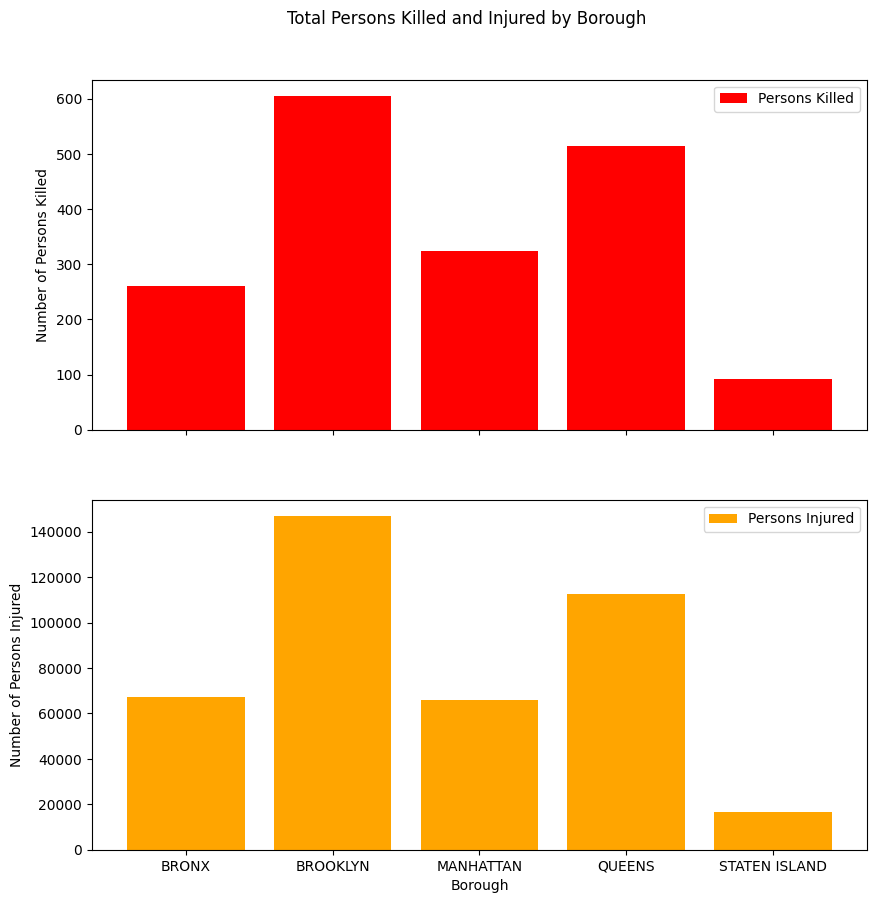

In [42]:
Borough_group = df.groupby('BOROUGH').agg({'NUMBER_OF_PERSONS_KILLED': 'sum', 'NUMBER_OF_PERSONS_INJURED': 'sum'})


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.bar(Borough_group.index, Borough_group['NUMBER_OF_PERSONS_KILLED'], color='red', label='Persons Killed')
ax1.set_ylabel('Number of Persons Killed')
ax1.legend()

ax2.bar(Borough_group.index, Borough_group['NUMBER_OF_PERSONS_INJURED'], color='orange', label='Persons Injured')
ax2.set_ylabel('Number of Persons Injured')
ax2.legend()

plt.xlabel('Borough')
plt.suptitle('Total Persons Killed and Injured by Borough', y=0.95)
plt.show()

In [43]:
Injured_pcts = Borough_group.NUMBER_OF_PERSONS_INJURED/Borough_group.NUMBER_OF_PERSONS_INJURED.sum()
print("Injured % by borough")
Injured_pcts

Injured % by borough


BOROUGH
BRONX            0.164798
BROOKLYN         0.358599
MANHATTAN        0.161036
QUEENS           0.274742
STATEN ISLAND    0.040825
Name: NUMBER_OF_PERSONS_INJURED, dtype: float64

In [44]:
killd_pcts = Borough_group.NUMBER_OF_PERSONS_KILLED/Borough_group.NUMBER_OF_PERSONS_KILLED.sum()
print("Killed % by borough")
killd_pcts

Killed % by borough


BOROUGH
BRONX            0.145323
BROOKLYN         0.336303
MANHATTAN        0.180401
QUEENS           0.286748
STATEN ISLAND    0.051225
Name: NUMBER_OF_PERSONS_KILLED, dtype: float64

## Group by month summing total killed and injured

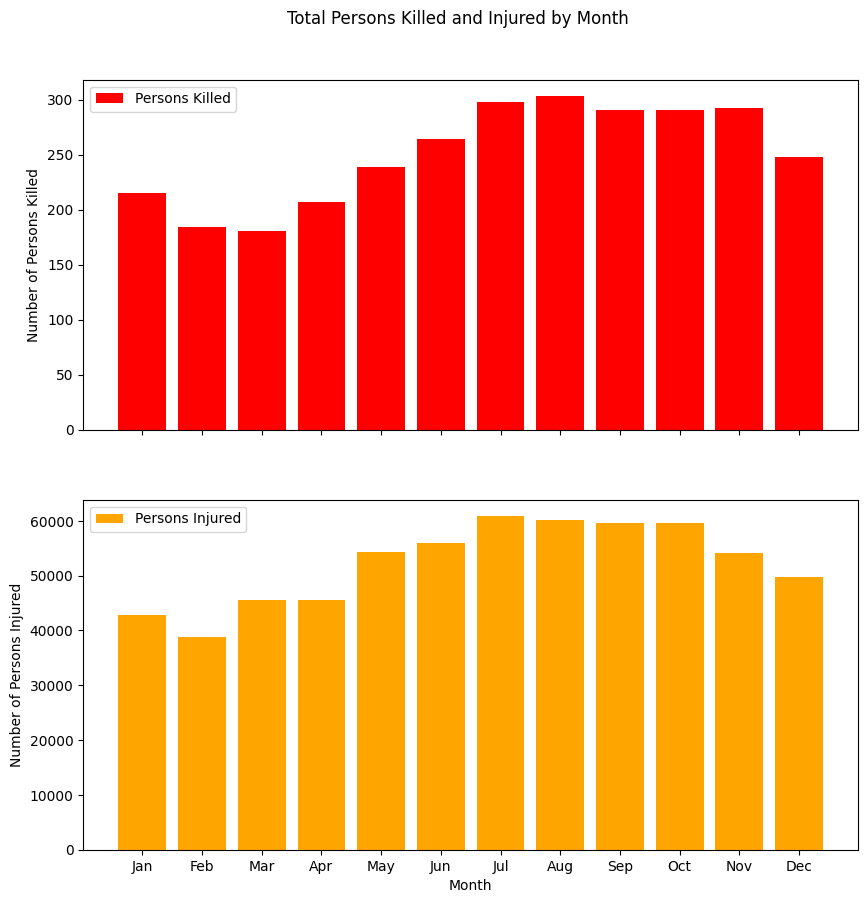

In [45]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
group_month = df.groupby(df['CRASH_DATE'].dt.month).agg({
    'NUMBER_OF_PERSONS_KILLED': 'sum',
    'NUMBER_OF_PERSONS_INJURED': 'sum'
})

# Changing the name of the month number to month name
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
group_month.index = month

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Bar plot for persons killed
ax1.bar(group_month.index, group_month['NUMBER_OF_PERSONS_KILLED'], color='red', label='Persons Killed')
ax1.set_ylabel('Number of Persons Killed')
ax1.legend()

# Bar plot for persons injured
ax2.bar(group_month.index, group_month['NUMBER_OF_PERSONS_INJURED'], color='orange', label='Persons Injured')
ax2.set_ylabel('Number of Persons Injured')
ax2.legend()

plt.xlabel('Month')
plt.suptitle('Total Persons Killed and Injured by Month', y=0.95)
plt.show()

## 0.5. Monthly Proportion of Injuries and Fatalities in Collisions

In [50]:
Injured_per_month = group_month.NUMBER_OF_PERSONS_INJURED/group_month.NUMBER_OF_PERSONS_INJURED.sum()
Injured_per_month

Jan    0.068255
Feb    0.061856
Mar    0.072685
Apr    0.072546
May    0.086525
Jun    0.089321
Jul    0.096974
Aug    0.095885
Sep    0.095148
Oct    0.095172
Nov    0.086198
Dec    0.079435
Name: NUMBER_OF_PERSONS_INJURED, dtype: float64

In [49]:
Killed_per_month = group_month.NUMBER_OF_PERSONS_KILLED/group_month.NUMBER_OF_PERSONS_KILLED.sum()
Killed_per_month

Jan    0.071357
Feb    0.061069
Mar    0.060073
Apr    0.068702
May    0.079323
Jun    0.087620
Jul    0.098905
Aug    0.100564
Sep    0.096581
Oct    0.096581
Nov    0.096913
Dec    0.082310
Name: NUMBER_OF_PERSONS_KILLED, dtype: float64

## Comparative Analysis of Accident Severity by Time and Weekday

C:\Users\Home\AppData\Local\Temp\ipykernel_7824\637250048.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour_of_Day'] = pd.to_datetime(df['CRASH_TIME']).dt.hour
C:\Users\Home\AppData\Local\Temp\ipykernel_7824\637250048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hour_dataset, x='Hour_of_Day', palette='gnuplot')


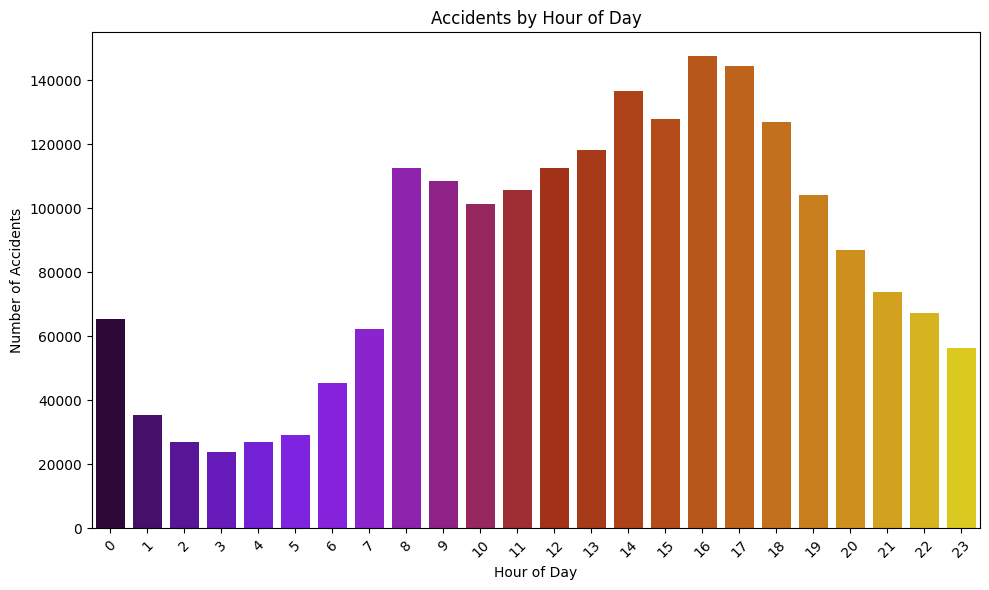

C:\Users\Home\AppData\Local\Temp\ipykernel_7824\637250048.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


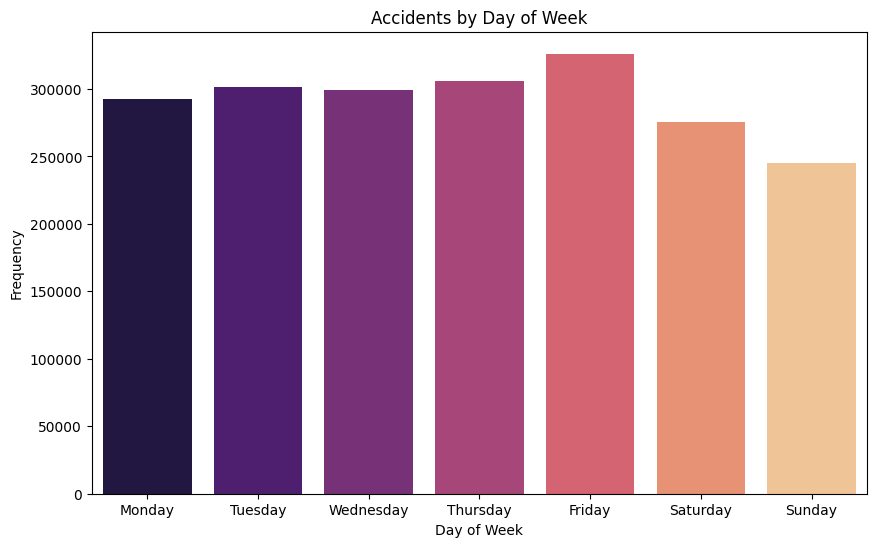

In [48]:
# Extract hour of day from 'CRASH_TIME'
df['day_of_week'] = pd.to_datetime(df['CRASH_DATE']).dt.day_name()
df['Hour_of_Day'] = pd.to_datetime(df['CRASH_TIME']).dt.hour

# Convert 'day_of_week' to categorical type
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

hour_dataset = df[['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED', 'Hour_of_Day']].copy()

# Visualize accidents by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=hour_dataset, x='Hour_of_Day', palette='gnuplot')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='magma', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Accidents by Day of Week')
plt.show()